# Support Class 6 - Problem sheet 5

You will probably need to install `networkx` on your laptop. Documentation can be found here: [https://networkx.github.io/documentation/stable/index.html](https://networkx.github.io/documentation/stable/index.html).

**INSTALL:**
- Try `pip install networkx`, `sudo pip install networkx` or with `pip3`
- or `pip install --user networkx`

In [10]:
# Load packages 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Networkx basics

This stuff will be similar to the tutorial page found in the link above!

A nice introductory presentation can be found here too: https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf

First we create an empty graph G.

In [11]:
G = nx.Graph()
G

Then we can add edges (in this case from nodes labeled 1,2,3, and 4). The nodes can be given other names if wanted - see package.

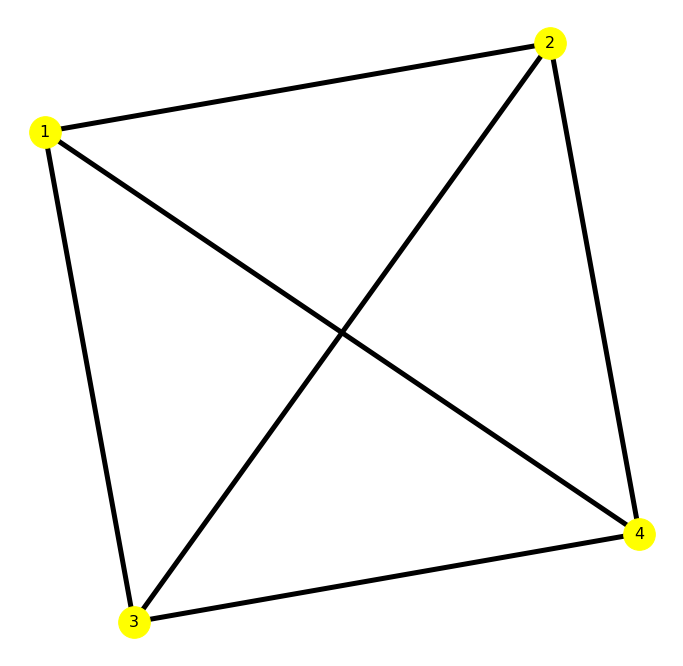

In [12]:
G.add_edge('1','2')
G.add_edge('1','3')
G.add_edge('2','3')
G.add_edge('1','4')
G.add_edge('3','4')
G.add_edge('2','4')

plt.figure(figsize = (12,12))
#pos=nx.circular_layout(G)
pos = nx.fruchterman_reingold_layout(G);
nx.draw_networkx(G, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');

Or we can add a bunch of nodes.

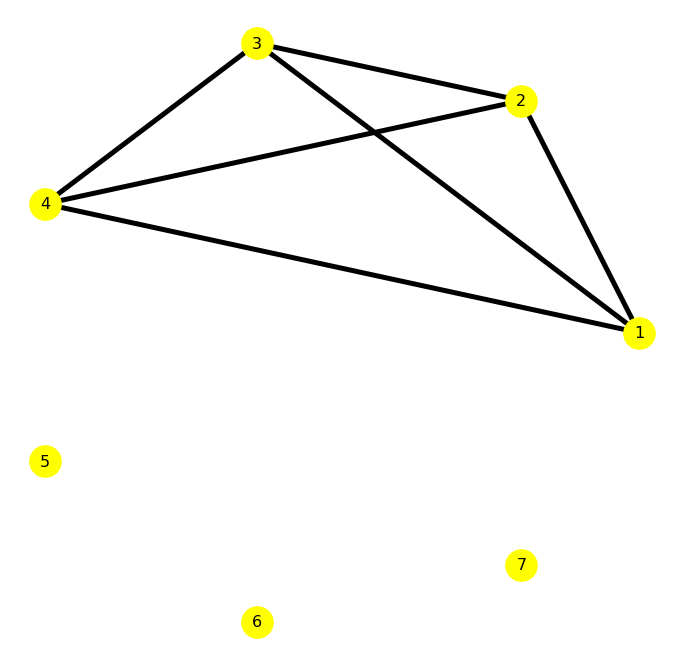

In [13]:
G.add_node('5')
G.add_nodes_from(['6','7'])

plt.figure(figsize = (12,12))
pos=nx.circular_layout(G)
nx.draw_networkx(G, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');

We can add weights to the edges too.

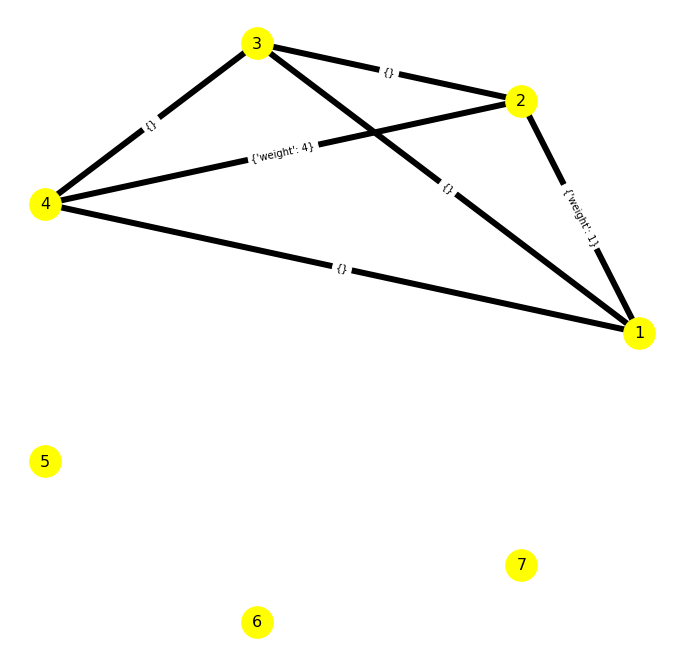

In [14]:
G.add_edge('1','2', weight = 1)
G.add_edge('2','4', weight = 4)

plt.figure(figsize = (12,12))
labels = G.nodes()
pos=nx.circular_layout(G)
nx.draw_networkx(G, with_labels = True,node_color = 'yellow',node_size=1000,pos = pos, font_size=16, width=6) 

nx.draw_networkx_edge_labels(G,pos);
plt.axis('off');

We can also remove edges.

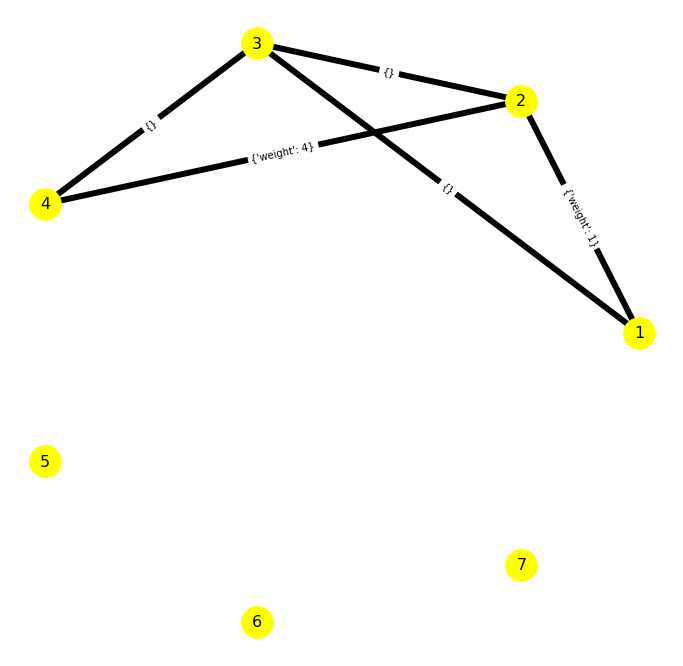

In [15]:
G.remove_edge('1','4')

plt.figure(figsize = (12,12))
labels = G.nodes()
pos=nx.circular_layout(G)
nx.draw_networkx(G, with_labels = True,node_color = 'yellow',node_size=1000,pos = pos, font_size=16, width=6) 

nx.draw_networkx_edge_labels(G,pos);
plt.axis('off');

Clear the graph.

In [16]:
G.clear()

Can join two graph strucutres together.

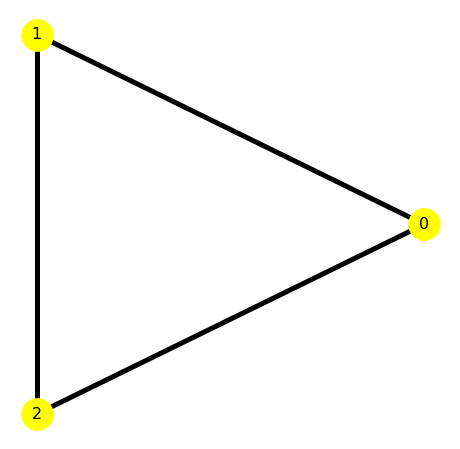

In [18]:
G1 = nx.Graph([(0,1),(1,2),(2,0)])

plt.figure(figsize = (8,8))
pos=nx.circular_layout(G1)
nx.draw_networkx(G1, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');


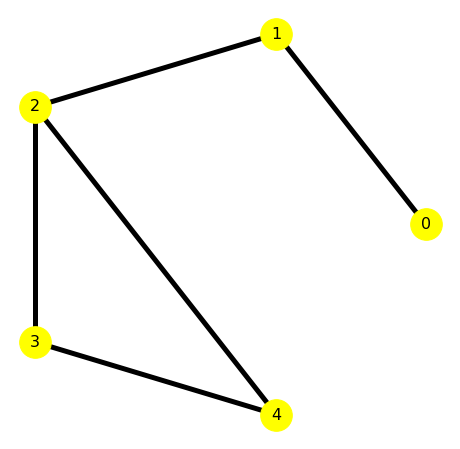

In [19]:
G2 = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4)])

plt.figure(figsize = (8,8))
pos=nx.circular_layout(G2)
nx.draw_networkx(G2, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');


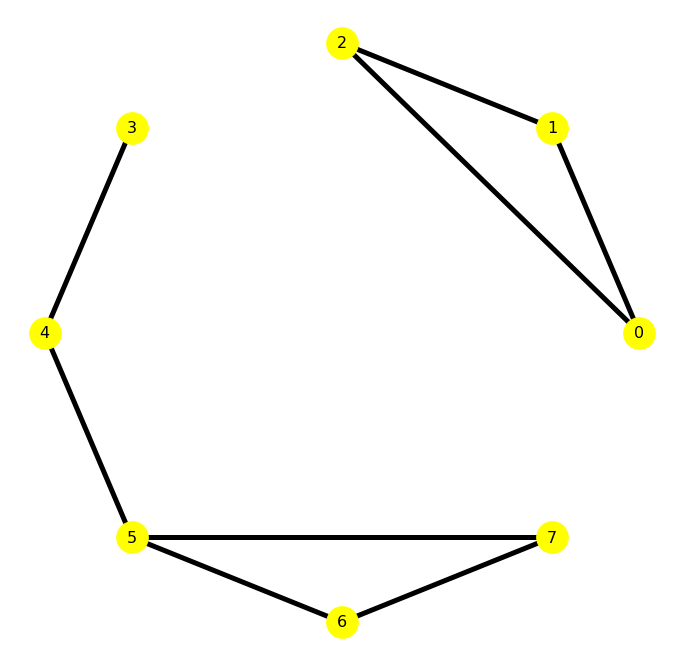

In [20]:
G3 = nx.disjoint_union(G1,G2)

plt.figure(figsize = (12,12))
pos=nx.circular_layout(G3)
nx.draw_networkx(G3, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');

Notice how the node labels change when they are joined together.

We can also compose graphs together (i.e. nodes with same labels become one node) and again the labels get changed. 

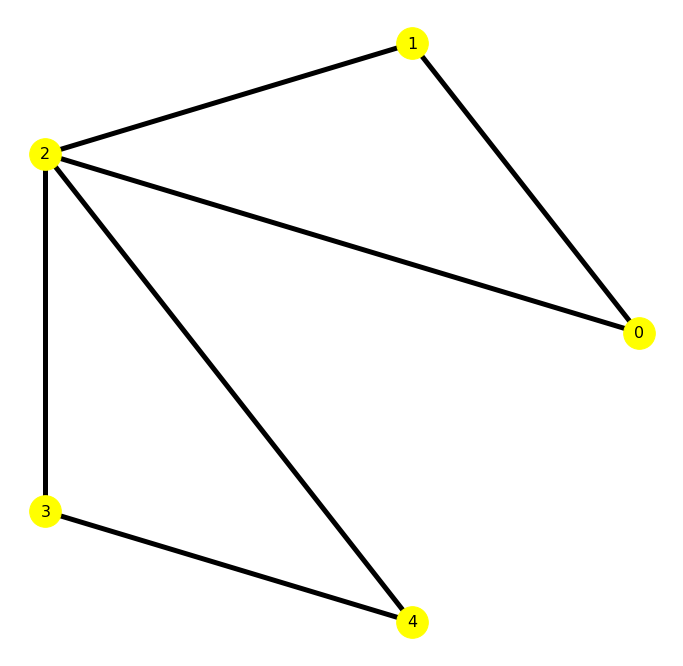

In [21]:
G4 = nx.compose(G1,G2)

plt.figure(figsize = (12,12))
pos=nx.circular_layout(G4)
nx.draw_networkx(G4, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');

We can create graphs with directed edges. 

/home/kpentland/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


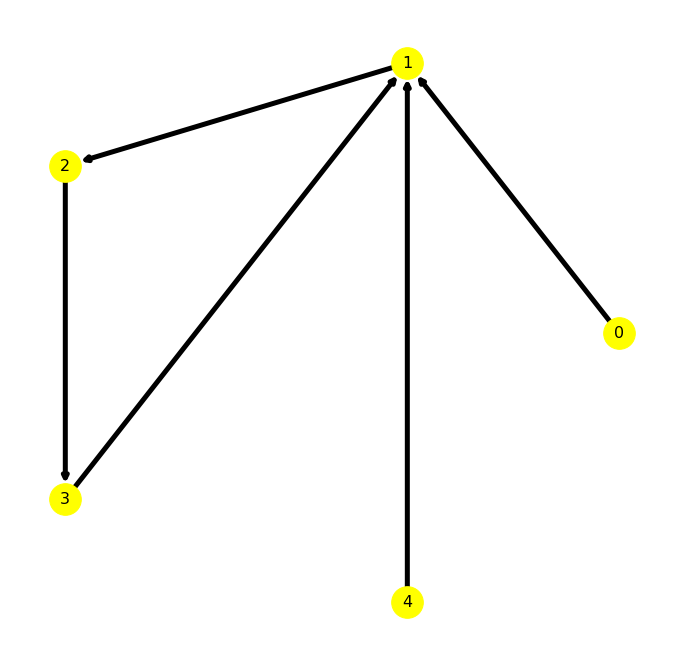

In [22]:
G.clear()

edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.DiGraph(edgelist)

plt.figure(figsize = (12,12))
pos=nx.circular_layout(G)
nx.draw_networkx(G, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');

We can find the components of a non-connected graph.

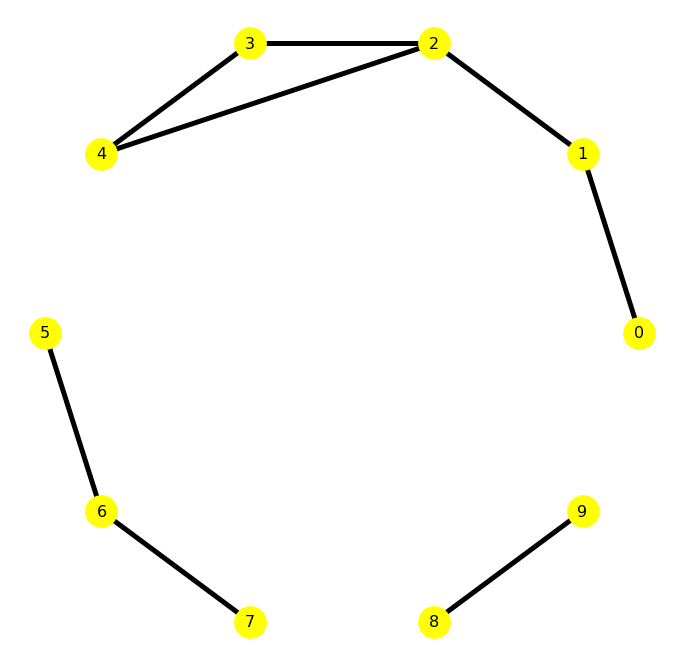

In [23]:
G.clear()
G = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4), (5,6), (6,7), (8,9)])

plt.figure(figsize = (12,12))
pos=nx.circular_layout(G)
nx.draw_networkx(G, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');

In [25]:
# get the components
Gcc = sorted([G.subgraph(c) for c in nx.connected_components(G)], key = len, reverse=True)
print(Gcc[0].nodes())
print(Gcc[1].nodes())
print(Gcc[2].nodes())

[0, 1, 2, 3, 4]
[5, 6, 7]
[8, 9]


Now we can look at the node/edge properties.

In [26]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [27]:
G.edges

EdgeView([(0, 1), (1, 2), (2, 3), (2, 4), (3, 4), (5, 6), (6, 7), (8, 9)])

Or we can find the total number of each.

In [28]:
N = len(G) # or use nx.number_of_nodes(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 10
Number of edges: 8


We can find the degrees of all nodes (and the average). 

In [32]:
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree = ', vk)

md = np.mean(vk)
print('Mean degree: ', md)

Degree =  [1 2 3 2 2 1 2 1 1 1]
Mean degree:  1.6


We can also write a small function to calculate the degree distribution. Not very interesting for this graph but will be for bigger ones!

In [33]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  
    vk = np.array(vk)        # store degree values in array
    
    maxk = np.max(vk)
    k = np.arange(0,maxk+1) # possible values of k
    
    pk = np.zeros(maxk+1) # degree distribution p(k)
    for i in vk:
        pk[i] = pk[i] + 1
    pk = pk/sum(pk) # the sum of the elements of P(k) must to be equal to one
    
    return k,pk

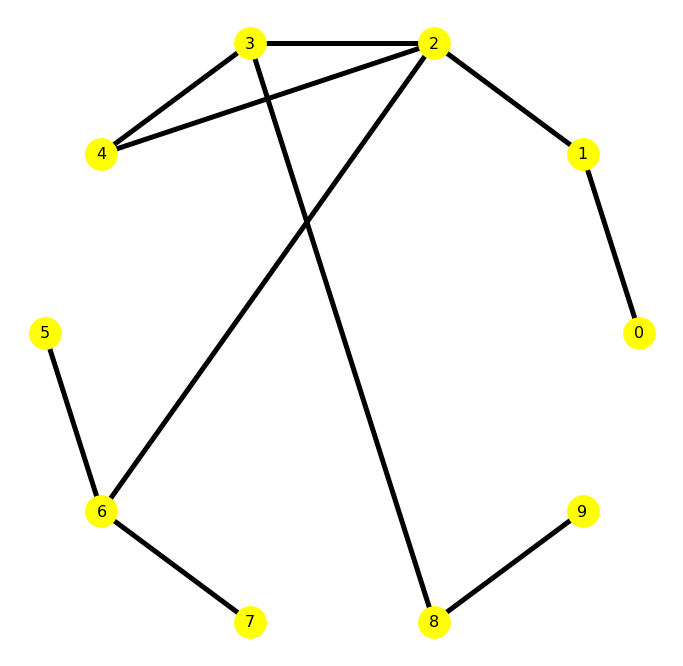

In [34]:
G.clear()
G = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4), (5,6), (6,7), (8,9),(6,2),(3,8)])

plt.figure(figsize = (12,12))
pos=nx.circular_layout(G)
nx.draw_networkx(G, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');

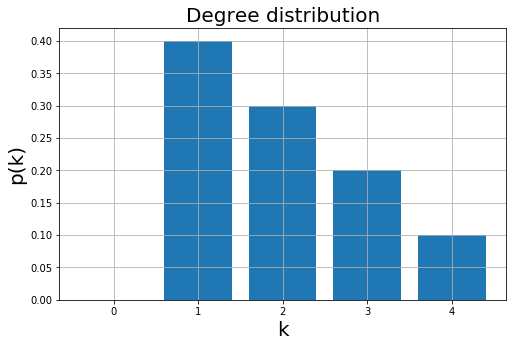

In [35]:
k, pk = degree_distribution(G)

plt.figure(figsize = (8,5))
plt.bar(k,pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)


We can also work out the $n$th moment of the degree distribution, i.e. 

$$ \langle k^n \rangle = \sum_{k} k^n p(k). $$  

In [36]:
def deg_dist_moments(G,n):
    k,pk = degree_distribution(G)
    sol = sum((k**n)*pk)
    return sol

In [37]:
k1 = deg_dist_moments(G,1)
k2 = deg_dist_moments(G,2)
print("First moment of the degree distribution = ", k1)
print("Second moment of the degree distribution = ", k2)
print("Degree variance = ", k2 - k1**2)

First moment of the degree distribution =  2.0
Second moment of the degree distribution =  5.0
Degree variance =  1.0


Now for the shortest paths between all pairs of nodes. Gives a list, but you can use this function (double check it works) to find the matrix of shortest paths $(D)_{i,j} = d_{i,j}$ for $i,j \in V$.

In [38]:
D_list = nx.shortest_path(G)
print(D_list)

{0: {0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 4], 6: [0, 1, 2, 6], 8: [0, 1, 2, 3, 8], 5: [0, 1, 2, 6, 5], 7: [0, 1, 2, 6, 7], 9: [0, 1, 2, 3, 8, 9]}, 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 4], 6: [1, 2, 6], 8: [1, 2, 3, 8], 5: [1, 2, 6, 5], 7: [1, 2, 6, 7], 9: [1, 2, 3, 8, 9]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 4], 6: [2, 6], 0: [2, 1, 0], 8: [2, 3, 8], 5: [2, 6, 5], 7: [2, 6, 7], 9: [2, 3, 8, 9]}, 3: {3: [3], 2: [3, 2], 4: [3, 4], 8: [3, 8], 1: [3, 2, 1], 6: [3, 2, 6], 9: [3, 8, 9], 0: [3, 2, 1, 0], 5: [3, 2, 6, 5], 7: [3, 2, 6, 7]}, 4: {4: [4], 3: [4, 3], 2: [4, 2], 8: [4, 3, 8], 1: [4, 2, 1], 6: [4, 2, 6], 9: [4, 3, 8, 9], 0: [4, 2, 1, 0], 5: [4, 2, 6, 5], 7: [4, 2, 6, 7]}, 5: {5: [5], 6: [5, 6], 7: [5, 6, 7], 2: [5, 6, 2], 1: [5, 6, 2, 1], 3: [5, 6, 2, 3], 4: [5, 6, 2, 4], 0: [5, 6, 2, 1, 0], 8: [5, 6, 2, 3, 8], 9: [5, 6, 2, 3, 8, 9]}, 6: {6: [6], 5: [6, 5], 7: [6, 7], 2: [6, 2], 1: [6, 2, 1], 3: [6, 2, 3], 4: [6, 2, 4], 0: [6, 2, 1,

In [39]:
#but we can (inefficiently) loop through each element and store each in matrix D
def shortest_path_matrix(G):
    D = np.zeros(shape=(len(G),len(G)))
    vl = [] #for the histogram below
    for i in np.arange(0,len(G)):
        for j in np.arange(i+1, len(G)):
            if(i != j):
                aux = nx.shortest_path(G,i,j)
                dij = len(aux) - 1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    return D, vl

[[0. 1. 2. 3. 3. 4. 3. 4. 4. 5.]
 [1. 0. 1. 2. 2. 3. 2. 3. 3. 4.]
 [2. 1. 0. 1. 1. 2. 1. 2. 2. 3.]
 [3. 2. 1. 0. 1. 3. 2. 3. 1. 2.]
 [3. 2. 1. 1. 0. 3. 2. 3. 2. 3.]
 [4. 3. 2. 3. 3. 0. 1. 2. 4. 5.]
 [3. 2. 1. 2. 2. 1. 0. 1. 3. 4.]
 [4. 3. 2. 3. 3. 2. 1. 0. 4. 5.]
 [4. 3. 2. 1. 2. 4. 3. 4. 0. 1.]
 [5. 4. 3. 2. 3. 5. 4. 5. 1. 0.]]


/home/kpentland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


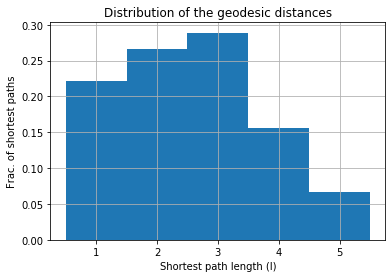

In [41]:
D, vl = shortest_path_matrix(G)

print(D)

# we can produce a histogram of the shortest paths
plt.hist(vl, bins = np.arange(0.5,np.max(vl)+1), normed=True)
plt.title("Distribution of the geodesic distances")
plt.ylabel("Frac. of shortest paths")
plt.xlabel("Shortest path length (l)")
plt.grid()
plt.show()

In [43]:
avg_D = nx.average_shortest_path_length(G)
print("Average shortest path length:", avg_D)

Average shortest path length: 2.577777777777778


In [44]:
d = nx.diameter(G)
print('Diameter (max. shortest path) = ', d)

Diameter (max. shortest path) =  5


### Karate Club Example

Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473._

Data collected from the members of a university karate club by Wayne Zachary. The adjacency matrix represents the presence or absence of ties among the members of the club.

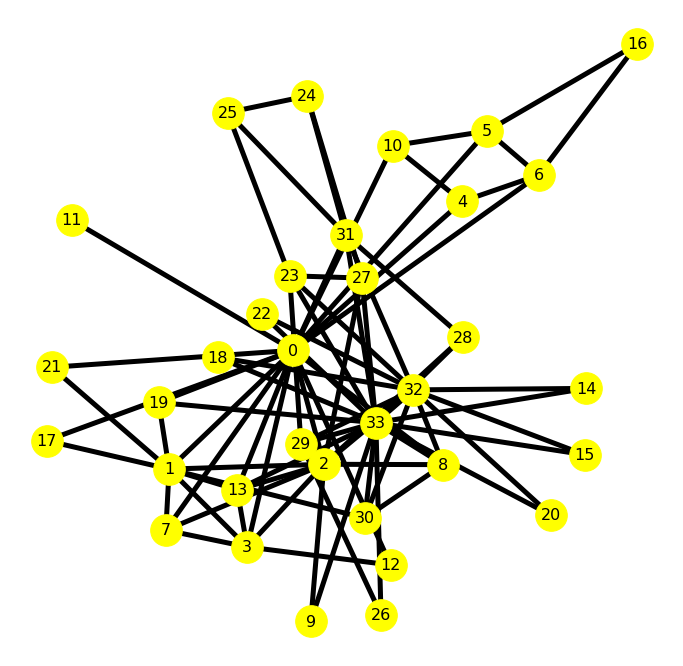

In [46]:
G.clear()
G = nx.karate_club_graph()

plt.figure(figsize = (12,12))
#pos=nx.circular_layout(G)
pos = nx.fruchterman_reingold_layout(G);
nx.draw_networkx(G, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');

In [47]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 34
Number of edges: 78


In [51]:
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree = ', vk)

Degree =  [16  9 10  6  3  4  4  4  5  2  3  1  2  5  2  2  2  2  2  3  2  2  2  5
  3  3  2  4  3  4  4  6 12 17]


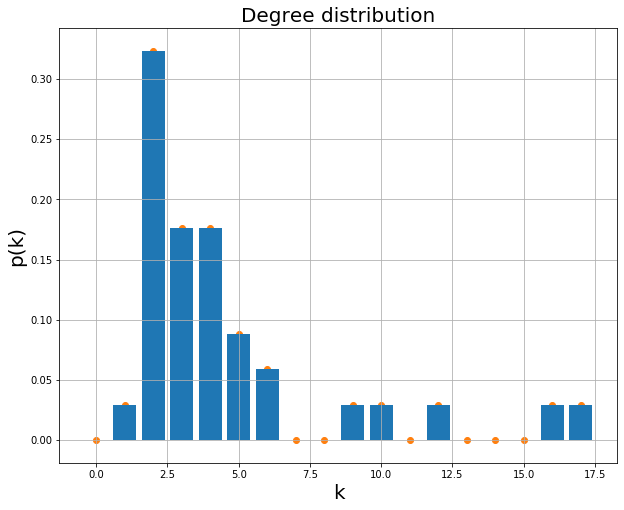

In [52]:
k, pk = degree_distribution(G)

plt.figure(figsize = (10,8))
plt.bar(k,pk)
plt.scatter(k,pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)

In [53]:
k1 = deg_dist_moments(G,1)
k2 = deg_dist_moments(G,2)
print("First moment of the degree distribution = ", k1)
print("Second moment of the degree distribution = ", k2)
print("Degree variance = ", k2 - k1**2)

First moment of the degree distribution =  4.588235294117648
Second moment of the degree distribution =  35.64705882352941
Degree variance =  14.595155709342556


/home/kpentland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


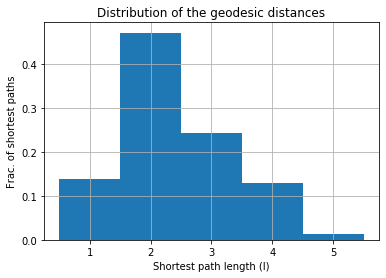

In [54]:
D, vl = shortest_path_matrix(G)

# we can produce a histogram of the shortest paths
plt.hist(vl, bins = np.arange(0.5,np.max(vl)+1), normed=True)
plt.title("Distribution of the geodesic distances")
plt.ylabel("Frac. of shortest paths")
plt.xlabel("Shortest path length (l)")
plt.grid()
plt.show()

In [55]:
avg_D = nx.average_shortest_path_length(G)
print("Average shortest path length:", avg_D)

d = nx.diameter(G)
print('Diameter (max. shortest path) = ', d)

Average shortest path length: 2.408199643493761
Diameter (max. shortest path) =  5


### Now for the graph from Q1.

We want to create a graph from an adjacency matrix.

In [56]:
A = np.array([[0,1,0,0,0,0,0,0,0,0,0],[1,0,1,1,1,0,0,0,0,0,0],[0,1,0,1,0,0,0,0,0,0,0],[0,1,1,0,1,1,0,0,0,0,0],[0,1,0,1,0,1,0,0,0,0,0],[0,0,0,1,1,0,1,1,1,0,0],[0,0,0,0,0,1,0,1,1,0,0],[0,0,0,0,0,1,1,0,1,1,1],[0,0,0,0,0,1,1,1,0,1,0],[0,0,0,0,0,0,0,1,1,0,1],[0,0,0,0,0,0,0,1,0,1,0]])
print(A)

[[0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0]
 [0 1 1 0 1 1 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 1 1 1 0 0]
 [0 0 0 0 0 1 0 1 1 0 0]
 [0 0 0 0 0 1 1 0 1 1 1]
 [0 0 0 0 0 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 0 0 1 0 1 0]]


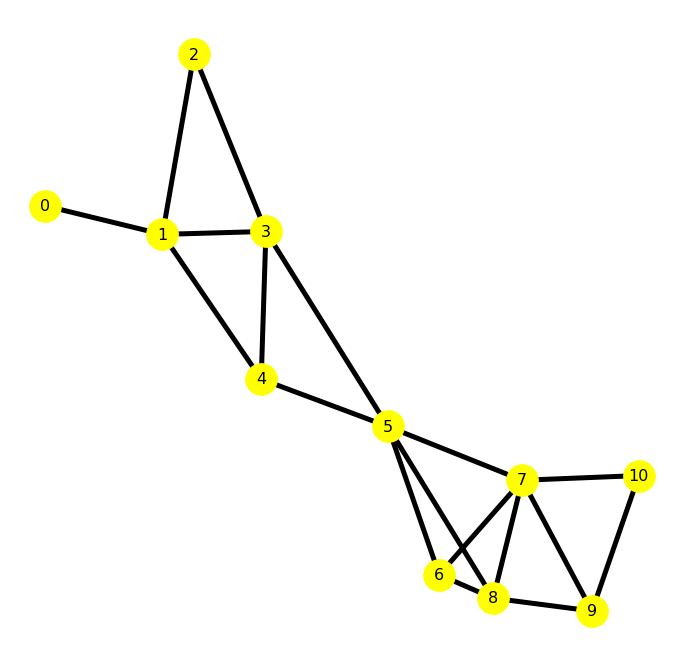

In [59]:
G.clear()
G = nx.from_numpy_matrix(A)

plt.figure(figsize = (12,12))
#pos=nx.circular_layout(G)
pos = nx.fruchterman_reingold_layout(G);
nx.draw_networkx(G, pos = pos, with_labels = True, node_color = 'yellow',node_size=1000, font_size=16, width=5) 
plt.axis('off');

In [60]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 11
Number of edges: 18


In [63]:
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree = ', vk)

Degree =  [1 4 2 4 3 5 3 5 4 3 2]


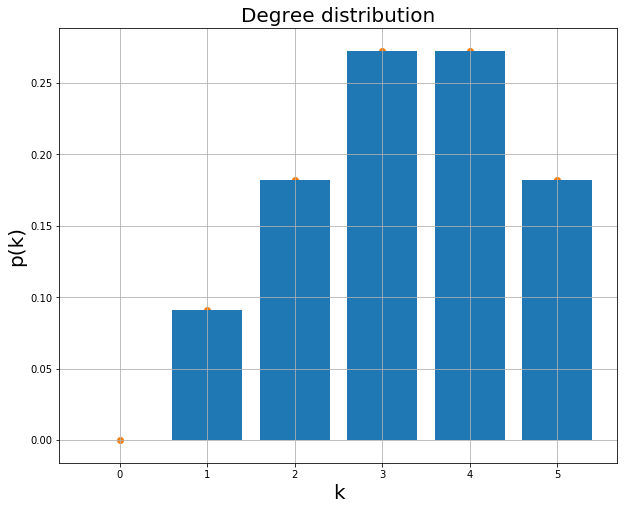

In [64]:
k, pk = degree_distribution(G)

plt.figure(figsize = (10,8))
plt.bar(k,pk)
plt.scatter(k,pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)


In [65]:
k1 = deg_dist_moments(G,1)
k2 = deg_dist_moments(G,2)
print("First moment of the degree distribution = ", k1)
print("Second moment of the degree distribution = ", k2)
print("Degree variance = ", k2 - k1**2)

First moment of the degree distribution =  3.2727272727272725
Second moment of the degree distribution =  12.181818181818182
Degree variance =  1.471074380165291


/home/kpentland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


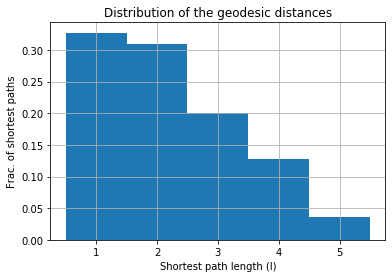

In [66]:
D, vl = shortest_path_matrix(G)

# we can produce a histogram of the shortest paths
plt.hist(vl, bins = np.arange(0.5,np.max(vl)+1), normed=True)
plt.title("Distribution of the geodesic distances")
plt.ylabel("Frac. of shortest paths")
plt.xlabel("Shortest path length (l)")
plt.grid()
plt.show()

In [67]:
avg_D = nx.average_shortest_path_length(G)
print("Average shortest path length:", avg_D)

d = nx.diameter(G)
print('Diameter (max. shortest path) = ', d)

Average shortest path length: 2.2363636363636363
Diameter (max. shortest path) =  5


## Random graphs

You can see Emma's old notebooks (7-10) for more analysis on these graphs - specifically how to find/plot the degree tail distributions or the Wigner semi-circle law etc.

### Erdos-Renyi

Definition: An ER random graph $G_{N,k}$ has uniform distribution on the set of all possible undirected graphs with $N$ vertices and $k = |E|/2$ edges.

Essentially: it has $N$ nodes and each edge is present with probability $p$ where $p = z/(N-1)$ and $z$ is the expected degree, i.e. $z = \langle k \rangle$.

`nx.gnp_random_graph`: Returns a $G_{n,k}$ random graph, also known as an Erdős-Rényi random graph or a binomial graph.

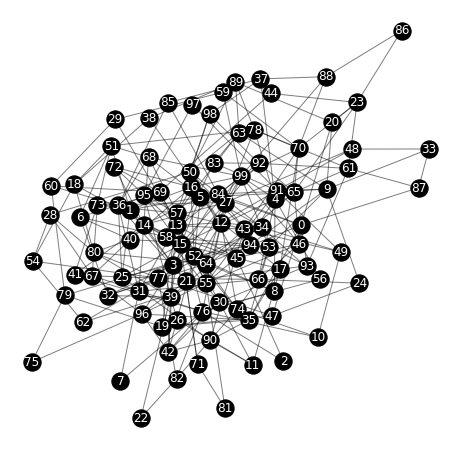

In [76]:
N = 100     # number of nodes
z = 5       # expected degree
p = z/(N-1) # probability that an edge is added

G = nx.gnp_random_graph(N,p) 

pos = nx.fruchterman_reingold_layout(G);
#pos=nx.circular_layout(G)
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

In [77]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

k1 = deg_dist_moments(G,1)
k2 = deg_dist_moments(G,2)
print("First moment of the degree distribution = ", k1)
print("Second moment of the degree distribution = ", k2)
print("Degree variance = ", k2 - k1**2)

Number of nodes: 100
Number of edges: 271
First moment of the degree distribution =  5.42
Second moment of the degree distribution =  34.599999999999994
Degree variance =  5.223599999999994


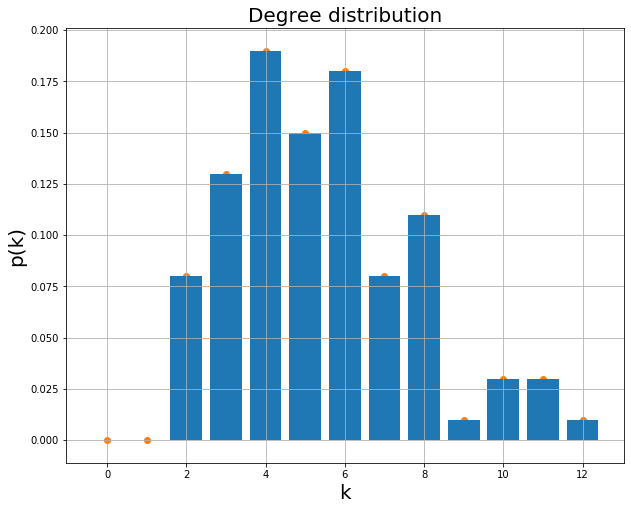

In [78]:
k, pk = degree_distribution(G)

plt.figure(figsize = (10,8))
plt.bar(k,pk)
plt.scatter(k,pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)

We can find the size of the connected components.

In [80]:
Gcc = sorted([G.subgraph(c) for c in nx.connected_components(G)], key = len, reverse=True)
print(len(Gcc[0].nodes()))
print(len(Gcc[1].nodes()))

100


IndexError: list index out of range

And the average local clustering coefficients. This should be equal to the probability $p$ as $N \rightarrow \infty$!

In [81]:
avc = nx.average_clustering(G)
print("Average clustering:", avc, 'and p = ', p)

Average clustering: 0.03042857142857143 and p =  0.050505050505050504


#### Wigner semi-circle law

Spectrum of adjacency matrix $A$: set of eigenvalues of a matrix.

Plot eigenvalue against spectral density (and compare this to wigner semi-circle law).

Use `nx.to_numpy_matrix(G)` to get the adjacency matrix (in numpy format). There exists `nx.adjacency_matrix(G)` which creates a **sparse matrix** -- better for large data sets.

In [89]:
# pick input parameters and simulate 5 ER graphs

# we basically want the e'value set from each (as they will be different upon
# each realisation)
z = 10
N = 500
p = z/N
realisations = 5
E = np.zeros((realisations,N))
for i in range(realisations):
    G = nx.gnp_random_graph(N,p) # generate the graphs
    A = nx.to_numpy_matrix(G)    #find adjacency matrix
    evals, evecs = np.linalg.eig(A)  #calculate e'vales
    E[i,:] = np.sort(evals)  #sort in order

avg_evals = np.mean(E,axis=0)  #average the e'values over the realisations

Text(0, 0.5, 'ρ(λ)')

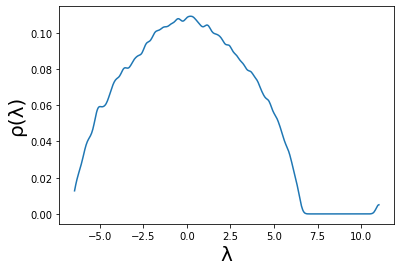

In [90]:
# find the spectral density using a kernel density estimate 
spectral_density = stats.gaussian_kde(avg_evals, bw_method = 0.05)

#plot the density
λ = np.linspace(avg_evals.min(), avg_evals.max(), N)
plt.plot(λ, spectral_density(λ))
plt.xlabel('λ', fontsize = 20)
plt.ylabel('ρ(λ)', fontsize = 20)

### Barabasi-Albert Model

Take the complete graph $G_{m0} = (V_0,E_0)$ and at each time step $t = 1,\dots,N-m_0$, add a new node $j = t+m_0$. This node forms $m \leq m_0$ edges with the existing nodes $i \in V_{t-1}$ with probability $p_i = k_i / \sum_{j \in V{t}} k_j$. 

The result is a BA random graph with $N$ nodes and ${m_0 \choose 2} + m(N-m_0)$ edges.

/home/kpentland/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


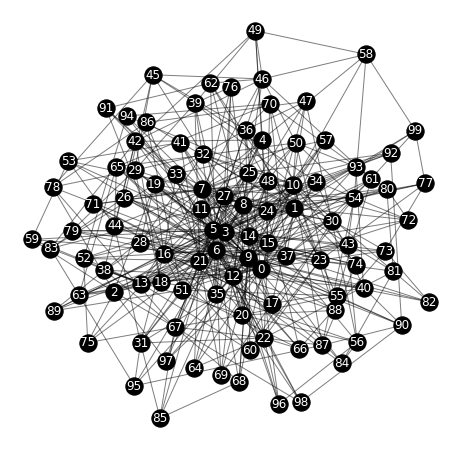

In [91]:
# in this implementation m0 = m.

m = 5     # number of edges added each time (preferential attachment) (also the number of initial nodes)
N = 100   # total number of nodes at the end

# initialization is a graph with with m nodes and no edges.
G = nx.barabasi_albert_graph(N, m) 

pos = nx.fruchterman_reingold_layout(G);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

In [92]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

k1 = deg_dist_moments(G,1)
k2 = deg_dist_moments(G,2)
print("First moment of the degree distribution = ", k1)
print("Second moment of the degree distribution = ", k2)
print("Degree variance = ", k2 - k1**2)

Number of nodes: 100
Number of edges: 475
First moment of the degree distribution =  9.500000000000002
Second moment of the degree distribution =  135.84
Degree variance =  45.589999999999975


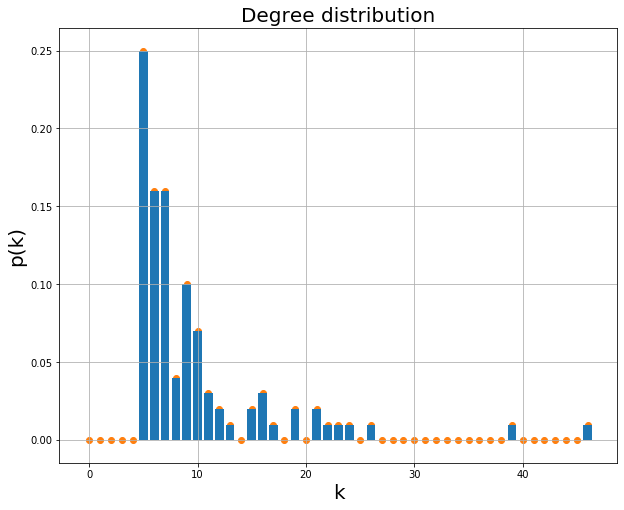

In [93]:
k, pk = degree_distribution(G)

plt.figure(figsize = (10,8))
plt.bar(k,pk)
plt.scatter(k,pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)

### Dorogovtsev-Goltsev-Mendes

This is just a generalisaion of the BA model with an altered probability. Start with $m_0=5$ nodes and then at each timestep we add a node, linking it to $m=5$ other existing nodes with some probability (see question sheet).

Note we need to import the extra python file 'graphUtils'.

Note how I haven't defined $m_0$ or $m$ (i.e. the number of intial connected nodes and how many egdes to add at each time step) - this is pre-defined in the packag. Test this out by setting N = 5 below.


In [94]:
import random           # random numbers
import graphUtils as gu # need this package (see the file on my Github). 

In [95]:
# we can simulate it using
N = 100
k0 = 1
G = gu.dms_graph_basic(N,k0)

N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

k1 = deg_dist_moments(G,1)
k2 = deg_dist_moments(G,2)
print("First moment of the degree distribution = ", k1)
print("Second moment of the degree distribution = ", k2)
print("Degree variance = ", k2 - k1**2)

Number of nodes: 100
Number of edges: 485
First moment of the degree distribution =  9.699999999999998
Second moment of the degree distribution =  139.06
Degree variance =  44.970000000000056


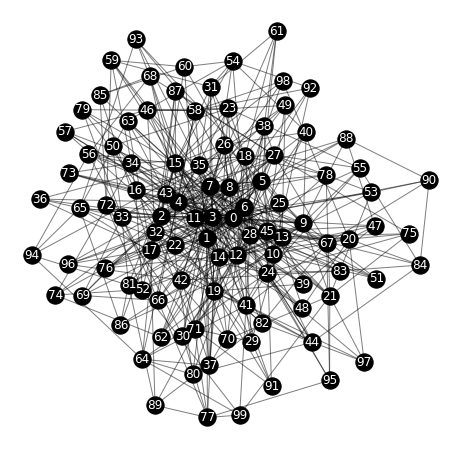

In [96]:
pos = nx.fruchterman_reingold_layout(G);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

/home/kpentland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  
/home/kpentland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


(0.7947274983110529, 100)

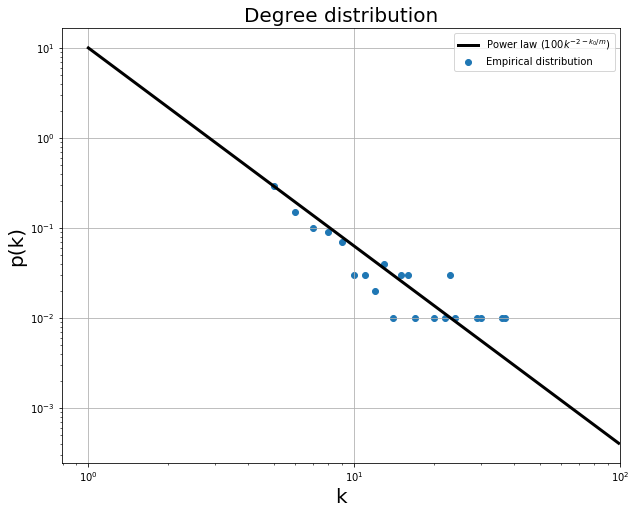

In [97]:
k, pk = degree_distribution(G)

plt.figure(figsize = (10,8))
#plt.bar(k,pk)
plt.scatter(k,pk, label='Empirical distribution')

pwr = -2.0 - (k0/5.0) # add the line
plt.plot(np.asarray(range(N)),10*np.asarray(range(N))**pwr,'k-',lw=3,label='Power law ($100k^{-2-k_0/m}$)')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.legend()
plt.grid(True)

plt.xlim(k0-1,N)

### Watts-Strogatz

/home/kpentland/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


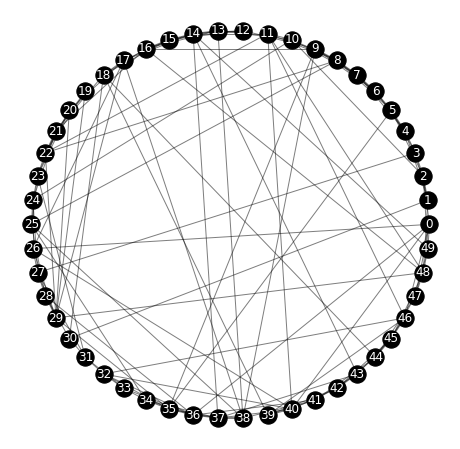

In [98]:
N = 50  # number of nodes
n = 6    # each node is connected to n nearest neighbours (in ring topology)
p = 0.4  # probability of re-wiring each edge

G = nx.watts_strogatz_graph(N,n,p) 

pos=nx.circular_layout(G)
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

In [99]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

k1 = deg_dist_moments(G,1)
k2 = deg_dist_moments(G,2)
print("First moment of the degree distribution = ", k1)
print("Second moment of the degree distribution = ", k2)
print("Degree variance = ", k2 - k1**2)

Number of nodes: 50
Number of edges: 150
First moment of the degree distribution =  6.0
Second moment of the degree distribution =  37.64
Degree variance =  1.6400000000000006


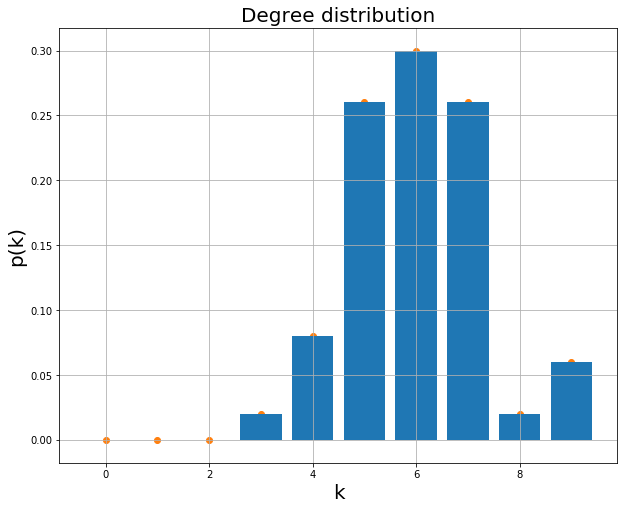

In [100]:
k, pk = degree_distribution(G)

plt.figure(figsize = (10,8))
plt.bar(k,pk)
plt.scatter(k,pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)